In [1]:
! pip install scenedetect[opencv]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 1.8 MB/s eta 0:00:00


In [2]:
! pip install ffmpeg-python

### Detect senes

In [3]:
!pip install pytube


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00


In [4]:
from pytube import YouTube

# Replace 'your_video_url' with the actual YouTube video URL
video_url = 'https://www.youtube.com/watch?v=Z_mEL5DIOgg'
youtube = YouTube(video_url)

# Get the highest resolution stream
video_stream = youtube.streams.get_highest_resolution()

# Download the video
video_stream.download()

'/content/الحكاية  عمرو أديب انا وباسم يوسف علاقتنا مش افضل شيء لكن له دين في رقبتي لن انساه.mp4'

In [5]:
import ffmpeg
! scenedetect -i video.mp4 time -s 10s detect-content list-scenes

[PySceneDetect] PySceneDetect 0.6.2
[PySceneDetect] Scene list filename format:
  $VIDEO_NAME-Scenes.csv
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Detecting scenes...
Detected: 1 | Progress: 100% 5257/5257 [00:15<00:00, 342.34frames/s]
[PySceneDetect] Processed 5257 frames in 15.7 seconds (average 335.71 FPS).
[PySceneDetect] Detected 2 scenes, average shot length 105.1 seconds.
[PySceneDetect] Writing scene list to CSV file:
  video-Scenes.csv
[PySceneDetect] Scene List:
-----------------------------------------------------------------------
 | Scene # | Start Frame |  Start Time  |  End Frame  |   End Time   |
-----------------------------------------------------------------------
 |      1  |         251 | 00:00:10.000 |        4956 | 00:03:18.240 |
 |      2  |        4957 | 00:03:18.240 |        5507 | 00:03:40.280 |
-----------------------------------------------------------------------

[PySceneDetect] Comma-separated timecode lis

### Save 3 shots per sene

In [1]:
!nvidia-smi

Sat Jan 13 04:17:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!scenedetect -i video.mp4 save-images
# the images saved automatic to the work directory

[PySceneDetect] PySceneDetect 0.6.2
[PySceneDetect] Image output format set: JPEG [Quality: 95]
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Detecting scenes...
Detected: 3 | Progress: 100% 5507/5507 [00:16<00:00, 341.84frames/s]
[PySceneDetect] Processed 5507 frames in 16.1 seconds (average 341.76 FPS).
[PySceneDetect] Detected 4 scenes, average shot length 55.1 seconds.
[PySceneDetect] Comma-separated timecode list:
  00:00:19.120,00:01:06.040,00:03:18.240
[PySceneDetect] Generating output images (3 per scene)...
100% 12/12 [00:02<00:00,  4.87images/s]


### Splitting Video to subvideos (Senes)

In [7]:
!scenedetect -i video.mp4 split-video
# the videos saved automatic to the work directory

[PySceneDetect] PySceneDetect 0.6.2
[PySceneDetect] ffmpeg arguments: -map 0 -c:v libx264 -preset veryfast -crf 22 -c:a aac
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Detecting scenes...
Detected: 3 | Progress: 100% 5507/5507 [00:16<00:00, 338.29frames/s]
[PySceneDetect] Processed 5507 frames in 16.3 seconds (average 338.22 FPS).
[PySceneDetect] Detected 4 scenes, average shot length 55.1 seconds.
[PySceneDetect] Comma-separated timecode list:
  00:00:19.120,00:01:06.040,00:03:18.240
[PySceneDetect] Splitting input video using ffmpeg, output path template:
  video-Scene-$SCENE_NUMBER.mp4
  0% 0/5507 [00:00<?, ?frame/s]ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-s

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installation Grounding Dino and SAM

In [5]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done


In [6]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [7]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
mkdir: cannot create directory ‘/content/weights’: File exists
/content/weights


In [8]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [9]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

/content
mkdir: cannot create directory ‘/content/data’: File exists
/content/data


In [19]:
!pip install addict
!pip install yapf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 5.5 MB/s eta 0:00:00


In [21]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.1 MB/s eta 0:00:00


In [18]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-oxx6r2d_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-oxx6r2d_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=65cc34fb772431e1908426739425a5bcd1044234a4f0610c6ddf696a29400239
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovu841xl/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [19]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.17.1
Uninstalling supervision-0.17.1:
  Successfully uninstalled supervision-0.17.1
0.17.1


In [20]:
!pip install -q roboflow

In [21]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [22]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [23]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
SAM_ENCODER_VERSION = "vit_h"

In [25]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [ ]:
f"{HOME}/data"

In [27]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data


/content
mkdir: cannot create directory ‘/content/data’: File exists
/content/data


In [33]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [35]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [47]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO
final text_encoder_type: bert-base-uncased


In [38]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
/content/GroundingDINO
error: The following untracked working tree files would be overwritten by checkout:
	groundingdino/version.py
Please move or remove them before you switch branches.
Aborting
  Preparing metadata (setup.py) ... done


Single Image Mask Auto Annotation

In [62]:
CLASSES = ['suit', 'person','amr adeeb','emad adeeb']


In [65]:
SOURCE_IMAGE_PATH = f"{HOME}/data/video-Scene-001-03.jpg"
CLASSES = ['person']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [45]:
SOURCE_IMAGE_PATH

'/content/data/video-Scene-001-03.jpg'

### Zero-Shot Object Detection with Grounding DINO

NOTE: To get better Grounding DINO detection we will leverage a bit of prompt engineering using enhance_class_name function defined below. 👇 You can learn more from our Grounding DINO tutorial.

In [29]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

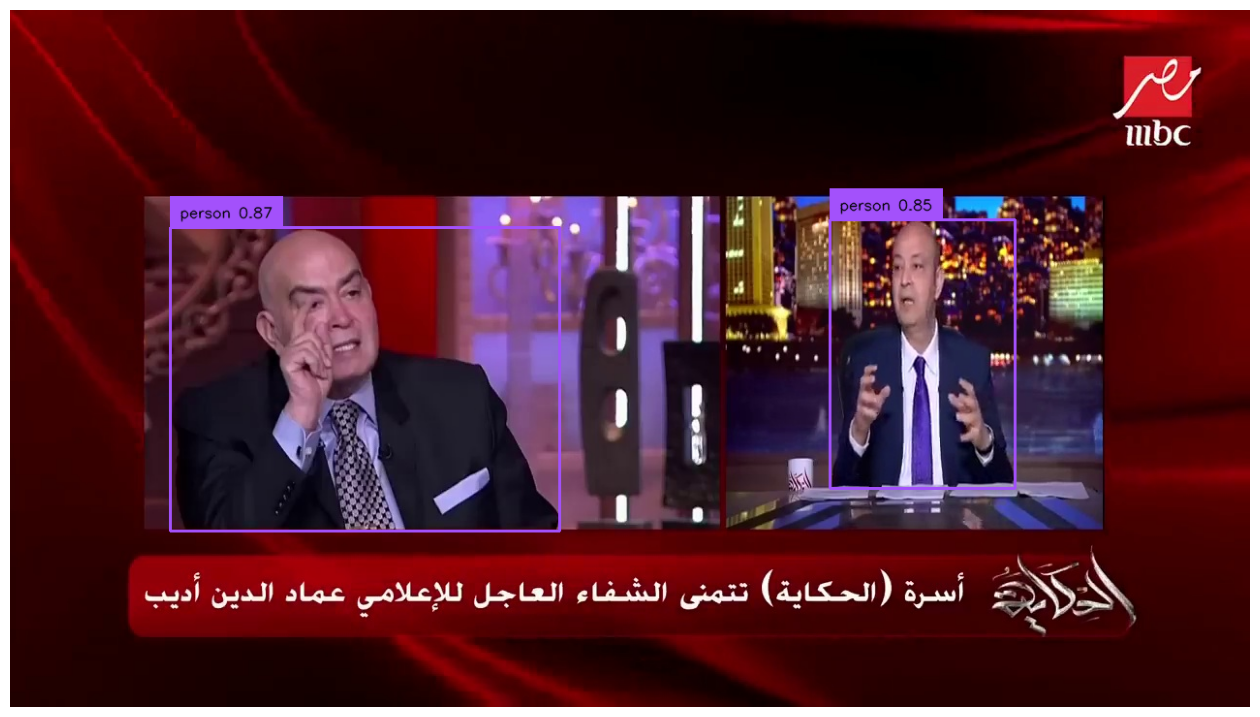

In [66]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

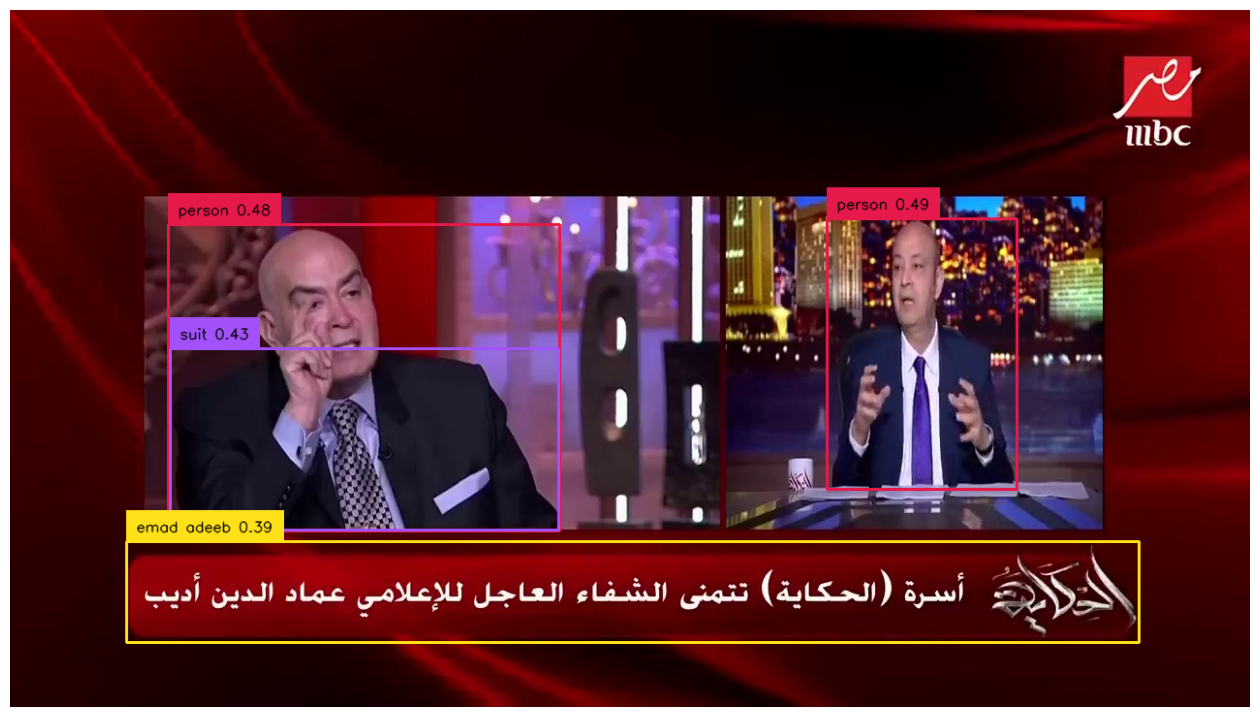

In [63]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

### Prompting SAM with detected boxes

In [30]:
import numpy as np
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

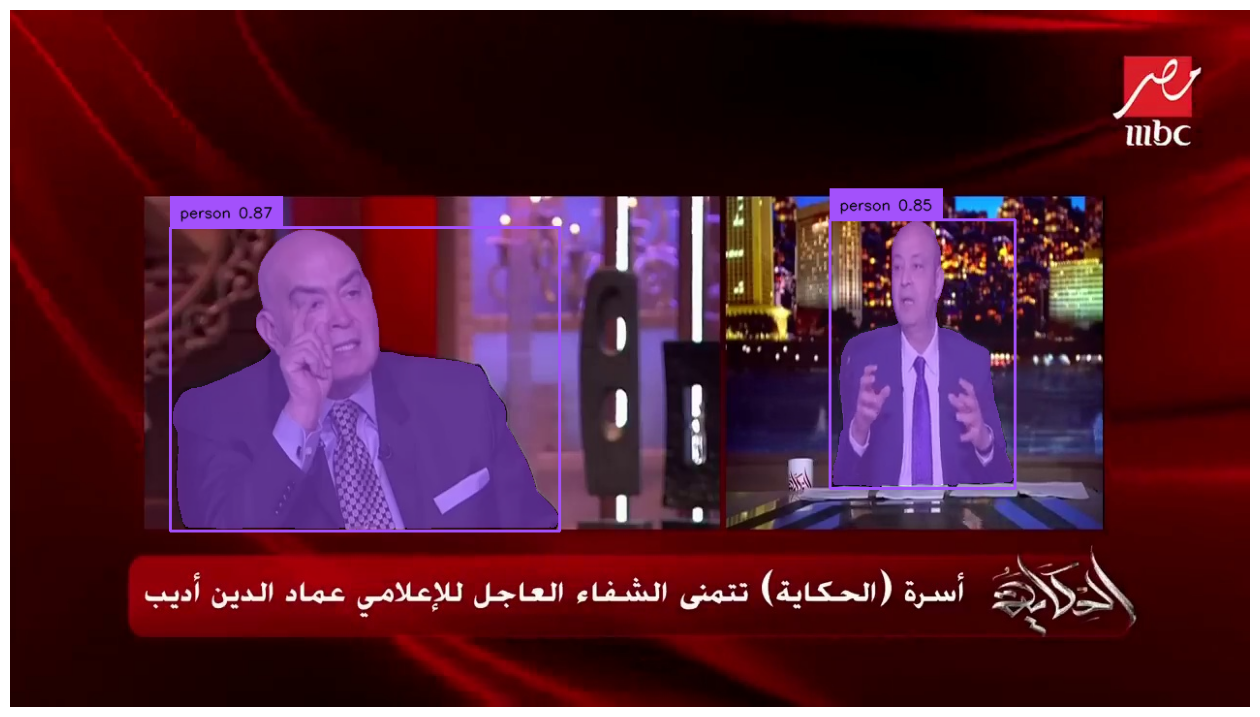

In [67]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

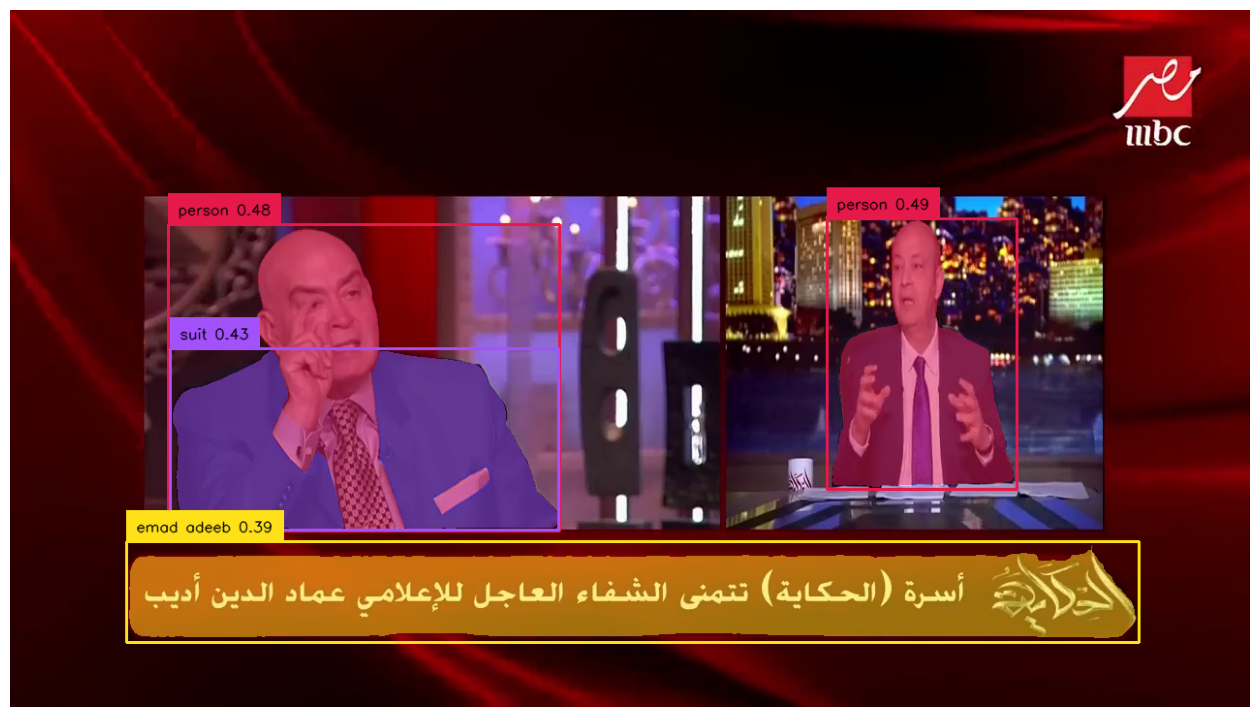

In [64]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

In [29]:
import locale
print(locale.getpreferredencoding())
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

ANSI_X3.4-1968


In [30]:
!pip install supervision

Full Scenes Mask Auto Annotation

In [68]:
import os

IMAGES_DIRECTORY = os.path.join(HOME, 'data')
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']

CLASSES = ['suit', 'person','amr adeeb','emad adeeb']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

Extract labels from images

In [71]:
import cv2
from tqdm.notebook import tqdm

images = {}
annotations = {}
IMAGES_DIRECTORY="/content/data"
image_paths = sv.list_files_with_extensions(
    directory=IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

for image_path in tqdm(image_paths):
    image_name = image_path.name
    image_path = str(image_path)
    image = cv2.imread(image_path)

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    detections = detections[detections.class_id != None]
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )
    images[image_name] = image
    annotations[image_name] = detections

  0%|          | 0/12 [00:00<?, ?it/s]

NOTE: Before we save our Detections in Pascal VOC XML format, let's take a peek at the annotations we obtained.

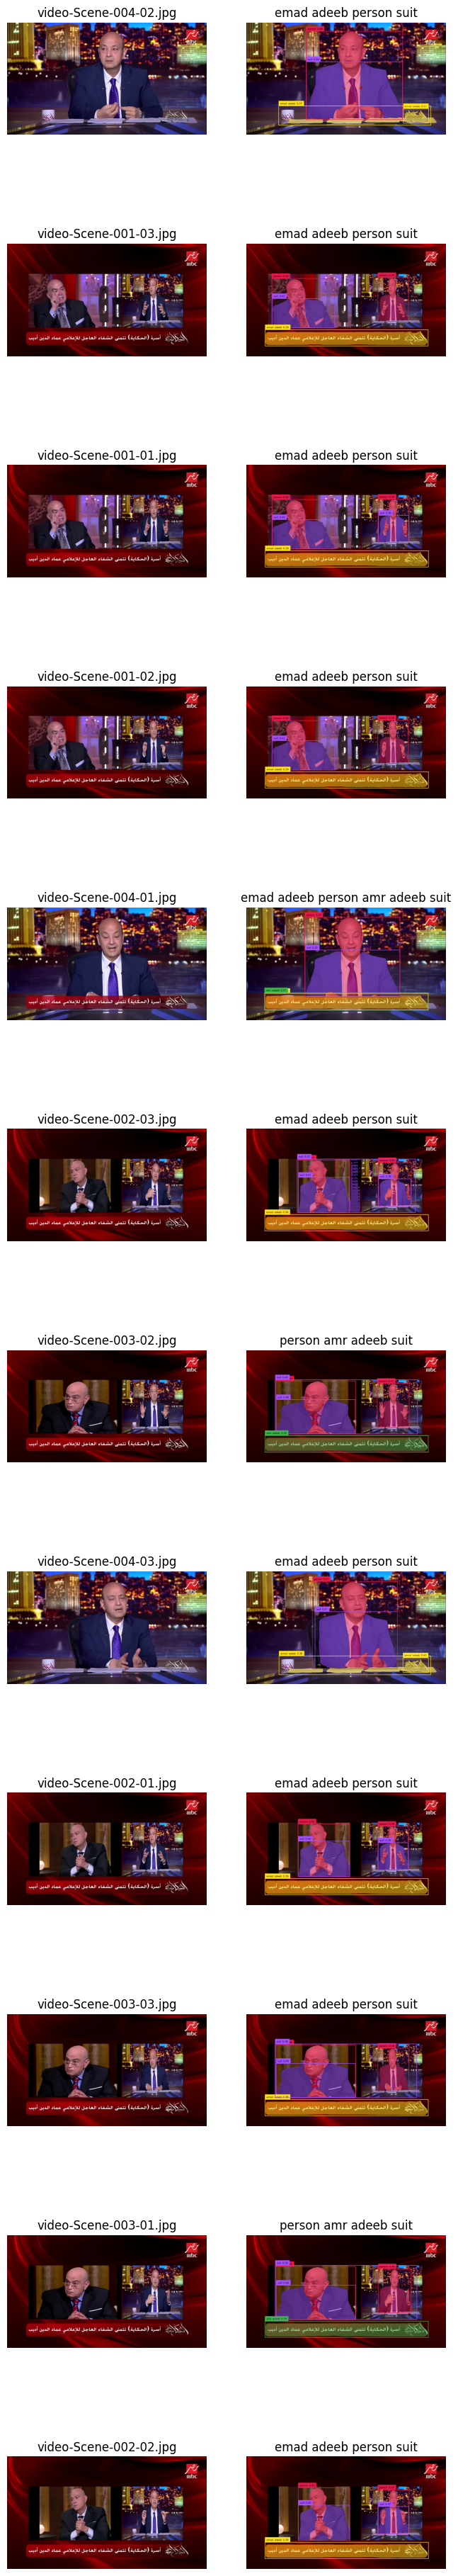

In [72]:
plot_images = []
plot_titles = []

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

for image_name, detections in annotations.items():
    image = images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)

    labels = [
        f"{CLASSES[class_id]} {confidence:0.2f}"
        for _, _, confidence, class_id, _
        in detections]
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
    plot_images.append(annotated_image)
    title = " ".join(set([
        CLASSES[class_id]
        for class_id
        in detections.class_id
    ]))
    plot_titles.append(title)

sv.plot_images_grid(
    images=plot_images,
    titles=plot_titles,
    grid_size=(len(annotations), 2),
    size=(2 * 4, len(annotations) * 4)
)